# London Airbnb Dataset Exploration

<div style="text-align: justify"> 
In this post, we are going to explore a really interesting dataset. That is the London Airbnb listings dataset. The data was scraped from the Airbnb site and is publicly available at [Inside Airbnb](http://insideairbnb.com/about.html). This dataset contains "publicly available information about a city's Airbnb's listings, Inside Airbnb provides filters and key metrics so you can see how Airbnb is being used to compete with the residential housing market".<br><br>

We are going to analyze this data interactively using a Python Jupyter notebook. This allows us a better interaction and visualization experience of the dataset. Before doing that, we need to configure your workspace first. There are two options: manually configure the environment or install a pre-configured python distribution such as [Anaconda](https://www.anaconda.com/download/). For this post, we used python version 2.7 so it would be best if you use that version as well. <br><br>

Additionally, we need to check if we have installed the required python libraries necessary to run the notebook. If you installed the anaconda distribution, you probably already have most of the packages already installed. If not, you can use pip to install them.
</div>

## 1. Packages Requirements

* python ~=2.7.13
* jupyter_core ~=4.3.0                    
* jupyterthemes ~=0.17.8  
* matplotlib ~=2.0.2
* lesscpy ~=0.12.0
* ipython ~=5.5.0
* numpy ~=1.12.1
* pandas ~=0.20.1
* scikit-learn ~=0.18.1
* seaborn ~=0.8

<div style="text-align: justify">
In case an __ImportError__ shows up, try to install the module specified in the error log using ```pip install module_name``` That should fix the problem.
</div>

## 2. Importing the Packages to your Notebook

<div style="text-align: justify">
We need to import the necessary packages to use them through the notebook. We are goingo to import libraries for data manipulation, visualization, validation, etc. Among the most useful libraries are pandas (For data manipulation), matplotlib (Matlab style plots) and sklearn (Model training and validation). We are going to use them plenty, so let's get to it !
</div>

In [2]:
# Data manipulation and visualization packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import lightgbm as lgb
import seaborn as sns

# Utilities packages
import string
import re
from collections import defaultdict
from jupyterthemes import jtplot

# Some libraries configuration options
pd.set_option("max_columns", None)
plt.rcParams["figure.figsize"] = [10,8]
jtplot.style(theme='onedork')
# set "context" (paper, notebook, talk, poster)
# scale font-size of ticklabels, legend, etc.
jtplot.style(context='talk', fscale=1.4, spines=False, gridlines='--')
# turn on X- and Y-axis tick marks (default=False)
# turn off the axis grid lines (default=True)
# and set the default figure size
jtplot.style(ticks=True, grid=False, figsize=(6, 4.5))
# reset default matplotlib rcParams
jtplot.reset()

<div style="text-align: justify">
Now we can use these packages anywhere in the notebook since they are loaded in the python kernel memory. In the next step we are going to import the Airbnb dataset that is available at the [Inside Airbnb London](http://data.insideairbnb.com/united-kingdom/england/london/2017-03-04/data/listings.csv.gz). Once you've download it, go to the next section.
</div>

## 3. Importing the Data Set

<div style="text-align: justify">
The data is formated as a csv file which is really simple to import into your Jupyter notebook using the pandas package. Since this dataset will occupy more memory than the pandas default setting. We must specify an argument to override the pandas low memory setting.
</div>

In [3]:
listings = pd.read_csv("data/listings.csv", low_memory=False)

<div style="text-align: justify">
Now let's display some rows to verify that the dataset was imported correctly. We can do that using the python slicing notation and the Jupyter notebook will render and style the table automaticaly. 
</div>

In [4]:
# Display the first 2 rows of the listings
listings[:2]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,15896822,https://www.airbnb.com/rooms/15896822,20170304065726,2017-03-05,Double room in newly refurbished flat,"My place is close to TK Max, John Lewis, Marks...",NaN,"My place is close to TK Max, John Lewis, Marks...",none,NaN,NaN,NaN,NaN,NaN,- Keep clean and tidy. Be respectful to the ot...,https://a0.muscache.com/im/pictures/1d9cad1f-a...,https://a0.muscache.com/im/pictures/1d9cad1f-a...,https://a0.muscache.com/im/pictures/1d9cad1f-a...,https://a0.muscache.com/im/pictures/1d9cad1f-a...,69018624,https://www.airbnb.com/users/show/69018624,Dafina,2016-04-26,"London, England, United Kingdom",NaN,within a day,100%,NaN,f,https://a0.muscache.com/im/pictures/3aa93e9d-0...,https://a0.muscache.com/im/pictures/3aa93e9d-0...,RB of Kingston upon Thames,1.0,1.0,"['email', 'phone', 'facebook']",t,f,"A Thames Street, Kingston upon Thames, England...",RB of Kingston upon Thames,Kingston upon Thames,NaN,Kingston upon Thames,England,KT1 1PE,London,"Kingston upon Thames, United Kingdom",GB,United Kingdom,51.410036,-0.306323,t,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,"{""Wireless Internet"",Kitchen,Washer,""Smoke det...",NaN,$23.00,NaN,NaN,NaN,NaN,1,$8.00,7,1125,6 weeks ago,NaN,1,31,61,61,2017-03-05,1,2016-12-03,2016-12-03,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,f,flexible,f,f,1,0.32
1,4836957,https://www.airbnb.com/rooms/4836957,20170304065726,2017-03-05,Modern room 25m from Central London,This lovely spacious double bedroom is set in ...,////*** This Price include Parking but not Kit...,This lovely spacious double bedroom is set in ...,family,Kingston upon Thames is a vibrant Surrey marke...,Guests can in advance ask for any help they mi...,Transport: 10 mins walk to overground station...,Spacious living room with King size sofa bed+d...,We usually provide warm welcome to our guests...,No smoking No Pets Please ask before using an...,https://a0.muscache.com/im/pictures/61075138/4...,https://a0.muscache.com/im/pictures/61075138/4...,https://a0.muscache.com/im/pictures/61075138/4...,https://a0.muscache.com/im/pictures/61075138/4...,18154504,https://www.airbnb.com/users/show/18154504,Anas,2014-07-15,London,We are a professional working couple in our la...,within a few hours,100%,NaN,f,https://a0.muscache.com/im/users/18154504/prof...,https://a0.muscache.com/im/users/18154504/prof...,RB of Kingston upon Thames,1.0,1.0,"['email', 'phone', 'reviews', 'jumio']",t,t,"London Road, Kingston upon Thames, Greater Lon...",RB of Kingston upon Thames,Kingston upon Thames,NaN,Kingston upon Thames,Greater London,KT2 6QS,London,"Kingston upon Thames, Unite

## 4. Feature Analysis & Feature Engineering

<div style="text-align: justify">
Now, a really important step in Machine Learning is the feature analysis and feature engineering. This allows us to gain valuable insight from our data and identify the most important features to train our predictive model. First, we must check which columns present the most null values. We must decide if they are worth keeping or not.
</div>

In [7]:
print "Total size of the Listings data: ", listings.shape
listings.apply(lambda x: sum(x.isnull()))

Total size of the Listings data:  (53904, 95)


id                                      0
listing_url                             0
scrape_id                               0
last_scraped                            0
name                                    1
summary                              1446
space                               17627
description                            10
experiences_offered                     0
neighborhood_overview               22615
notes                               33285
transit                             21106
access                              22616
interaction                         24659
house_rules                         20530
thumbnail_url                        6854
medium_url                           6854
picture_url                             0
xl_picture_url                       6854
host_id                                 0
host_url                                0
host_name                               9
host_since                              9
host_location                     

<div style="text-align: justify">
Additionally, we must select the columns that contain the features we will try to explore. It is recommended to use the features that have the least null values because dealing with the null values in the dataset can be really troublesome.
</div>

In [3]:
# We create an array with the features we want to keep.
selected_features = ['name', 'neighbourhood_cleansed', 'room_type', 'guests_included', 'minimum_nights',
                     'number_of_reviews', 'review_scores_rating', 'amenities', 'property_type',
                     'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'price']
selected_listings = listings.copy()[selected_features]
selected_listings.rename(columns = {'neighbourhood_cleansed':'neighbourhood'}, inplace = True)
selected_listings[:2]

,name,neighbourhood,room_type,guests_included,minimum_nights,number_of_reviews,review_scores_rating,amenities,property_type,accommodates,bathrooms,bedrooms,beds,bed_type,price
0,Double room in newly refurbished flat,Kingston upon Thames,Private room,1,7,1,100.0,"{""Wireless Internet"",Kitchen,Washer,""Smoke det...",Apartment,1,1.0,1.0,1.0,Real Bed,$23.00
1,Modern room 25m from Central London,Kingston upon Thames,Private room,1,1,15,91.0,"{TV,Internet,""Wireless Internet"",""Free parking...",Apartment,2,1.0,1.0,1.0,Pull-out Sofa,$50.00


<div style="text-align: justify">
So, let's verify thath the features we selected do not have a majority of invalid values. You can use the same method that we used at the begining of the section.
</div>

In [9]:
print "Counting missing features values..."
selected_listings.apply(lambda x: sum(x.isnull()))

Counting missing features values...


name                        1
neighbourhood               0
room_type                   0
guests_included             0
minimum_nights              0
number_of_reviews           0
review_scores_rating    17262
amenities                   0
property_type               0
accommodates                0
bathrooms                 260
bedrooms                   93
beds                      173
bed_type                    0
price                       0
dtype: int64

<div style="text-align: justify">
As we can see in the above cell, there are not many columns that have a considerable amount of invalid values, except __review_scores_rating__ but we are going to keep this feature to show some techniques to handle null values on a continuous numeric feature.
</div>

<div style="text-align: justify">
If we check the **price** column of the dataset, we can see that the price is not in a purely numeric format (i.e. It has the dollar sign prepended), so we must remove the preceding dollar symbol to cast it to a floating point numeric format. The following cell does the transformation we need to do to the __price__ column.
</div>

In [4]:
prices = selected_listings['price'].map(lambda p: int(p[1:-3].replace(",", "")))
selected_listings['price'] = prices
selected_listings['price'].describe()

count    53904.000000
mean        96.099622
std        117.641082
min          8.000000
25%         42.000000
50%         70.000000
75%        119.000000
max       7000.000000
Name: price, dtype: float64

<div style="text-align: justify">
Additionally to the price transformation, we displayed the statistic properties of the prices distribution using the built-in pandas method __describe()__. This method shows properties such as the mean, standard deviation, percentiles, etc. This information can provide some insight of the prices statistical distribution.
</div>

<div style="text-align: justify">
Now we are going to analize some of the prices we are trying to model. The following graphic displays the swarmplot of a sample of the prices. This plot show a scatterplot with non overlaping data points. To generate this graph we use the **seaborn** package along side **matplotlib** and a sample of the prices.
</div>

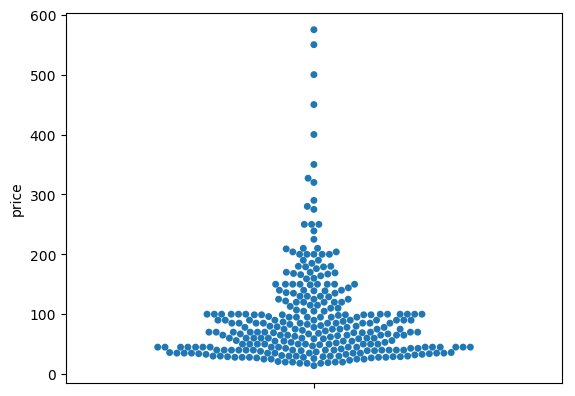

In [8]:
sns.swarmplot(y=prices.sample(300))
plt.show()

### 4.1 Exploring the relationship between price and the predictors

<div style="text-align: justify">
First, we are going to analyze the relationship between price and neighbourhood since these have an obvious relationship to reality. To show the relation between the price and the neighbourhood, we can generate a box plot of the prices distribution across the different neighbourhoods and display graphically this relation.
</div>

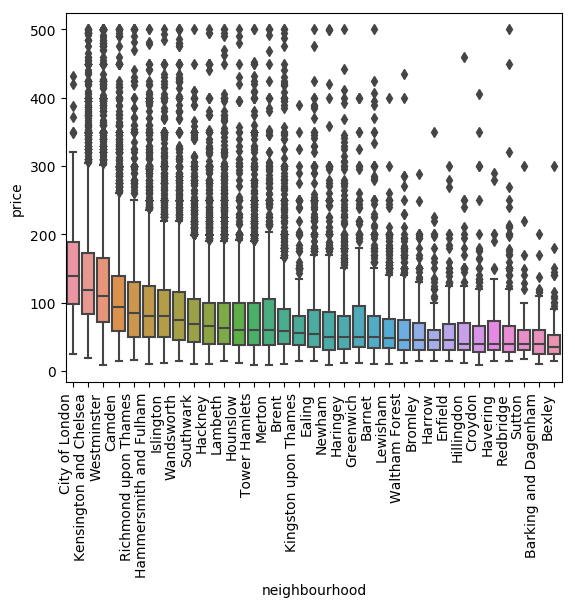

In [5]:
# First, we get the median values of the price per neighbourhood and sort them descending 
# to use them as the graph index.
price_neighbourhood = selected_listings.query('price <= 500')\
                    .groupby('neighbourhood')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index

# Then we filter the data to use only the prices within a certain range to avoid outliers         
data = selected_listings.query('price <= 500')

# We use seaborn boxplot to generate the graph, passing as parameters the target variable and 
# the feature we want to associate, and an additonal parameter "order" to plot them in a descending
# way.
sns.boxplot(y=data['price'], x=data['neighbourhood'], order=price_neighbourhood)

# Last, we get the plot axes and modify them to rotate the labels orientation
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
plt.show()

<div style="text-align: justify">
In the same way. We can analyze the spread of the prices distribution according to other features, like the room type. This help us to determine the features that split the data in the best way to achieve a decent predictive model. In the following snippet, we generate a boxplot of the prices in relation to the __room_type__ categories.
</div>

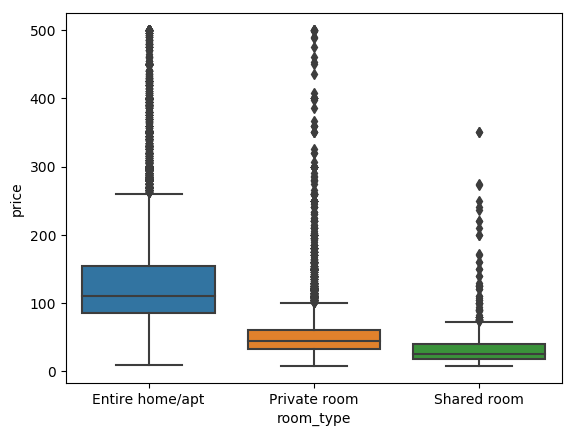

In [6]:
# First, we get the median values of the price per neighbourhood and sort them descending 
# to use them as the graph index.
room_price = selected_listings.query('price <= 500')\
                    .groupby('room_type')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
                
# Then we filter the data to use only the prices within a certain range to avoid outliers        
data = selected_listings.query('price <= 500')

# We use seaborn boxplot to generate the graph, passing as parameters the target variable and 
# the feature we want to associate, and an additonal parameter "order" to plot them descending.
sns.boxplot(y=data['price'], x=data['room_type'], order=room_price)
plt.show()

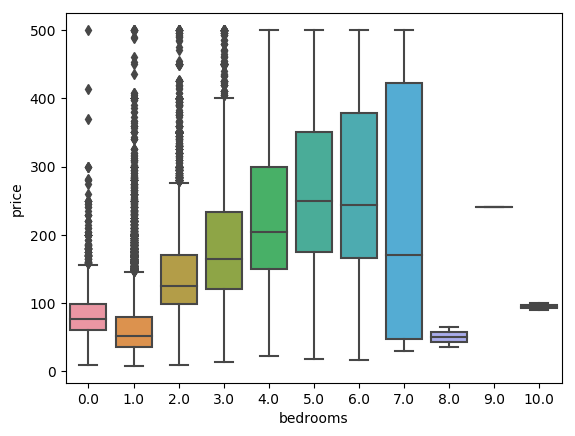

In [10]:
# Then we filter the data to use only the prices within a certain range to avoid outliers        
data = selected_listings.query('price <= 500')

# We use seaborn boxplot to generate the graph, passing as parameters the target variable and 
# the feature we want to associate, and an additonal parameter "order" to plot them descending.
sns.boxplot(y=data['price'], x=data['bedrooms'])
plt.show()

## 5. Conclusions

<div style="text-align: justify">
Analyzing the information in the plots in the previous section we can deduce the following conclusions about the dataset.
</div>
* From the swarm plot, we can see that the prices are concentrated around the 0\$ - 200\$ dollars interval. This makes sense because higher prices mean more exclusive and fancy places that are more scarce in contrast to the more affordable places which are more common.<br><br>

* The box plot of the price and the neighbourhood is really interesting since it allows to clearly see the prices distribution according to the neighbourhood. From this graph, we can determine which are the most affordable neighbourhoods and the most exclusive ones. Also since the neighbourhoods split the prices distributions in a consistent way, this could mean that this feature will be of importance to the model.<br><br>

* Another interesting observation comes from the __room_type__ / __price__ box plot. We can see that is considerably more expensive to rent an entire home or apartment compared to renting a private room or shared room. However, the difference in prices between private and shared rooms is not that much, so one could consider a private room most of the time.<br><br>

* And last, from the __bedrooms/price__ box plot, the prices are split in a consistent way. That could be another interesting feature for the model because, for example, decision trees find the best feature splits to model the prices distribution according to the predictor features. This graph indicates that the price of the property increases as the number of bedrooms increases (A kind of obvious observation) but with some different behaviour around 7 to 10 bedrooms since there is probably a limited amount of listings with that number of bedrooms.